# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [158]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [159]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
#len(cities)
#print(cities)

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [188]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="
print (query_url)

lat = []
lng = []
Temp = []
City = []
Cloudiness = []
Country = []
Date = []
Humidity = []
Max_Temp = []
Wind_Speed = []

for city in cities:
    try:
        response = requests.get(query_url + city).json()
        response_code = response['cod']
        if (str(response_code) == "200"):
            response_date = response['dt']
            response_date_2 = datetime.datetime.fromtimestamp(response_date).strftime('%Y-%m-%d %H:%M:%S.%f')
            response_lat = response['coord']['lat']
            response_lng = response['coord']['lon']
            response_temp = response['main']['temp']
            response_max_temp = response['main']['temp_max']
            response_humidity = response['main']['humidity']
            response_cloudiness = response['clouds']['all']
            response_windspeed = response['wind']['speed']
            response_city = response['name']
            response_country = response['sys']['country']
            # append Values #
            lat.append(response_lat)
            lng.append(response_lng)
            Temp.append(response_temp)
            City.append(response_city)
            Cloudiness.append(response_cloudiness)
            Country.append(response_country)
            Date.append(response_date_2)
            Humidity.append(response_humidity)
            Max_Temp.append(response_max_temp)
            Wind_Speed.append(response_windspeed)
        
            print(f"Processing Request for {city}")
    except ValueError:
            print("Error while executing remote API call")

# Create DataFrame

weather_dict = {
    "City": City,
    "Cloudiness": Cloudiness,
    "Country": Country,
    "Date": Date,
    "Humidity": Humidity,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": Max_Temp,
    "Wind Speed": Wind_Speed
}
weather_data = pd.DataFrame(weather_dict)
export_csv = weather_data.to_csv ("weather_out.csv")

http://api.openweathermap.org/data/2.5/weather?appid=21eebae5f56bdb09029a4e9985925702&units=metric&q=
Processing Request for praia da vitoria
Processing Request for hofn
Processing Request for camacha
Processing Request for san cristobal
Processing Request for jamestown
Processing Request for khor
Processing Request for vaini
Processing Request for iskateley
Processing Request for manggar
Processing Request for coihaique
Processing Request for huicheng
Processing Request for cape town
Processing Request for bredasdorp
Processing Request for albany
Processing Request for puerto ayora
Processing Request for punta arenas
Processing Request for iracoubo
Processing Request for busselton
Processing Request for kota tinggi
Processing Request for hobyo
Processing Request for kavieng
Processing Request for biak
Processing Request for mahajanga
Processing Request for yellowknife
Processing Request for butaritari
Processing Request for acajutla
Processing Request for barrow
Processing Request for

Processing Request for listvyagi
Processing Request for touros
Processing Request for puerto madero
Processing Request for bloemfontein
Processing Request for grande prairie
Processing Request for paamiut
Processing Request for yaan
Processing Request for garowe
Processing Request for elat
Processing Request for poum
Processing Request for tres picos
Processing Request for viedma
Processing Request for port-gentil
Processing Request for kidal
Processing Request for hun
Processing Request for vanderhoof
Processing Request for oster
Processing Request for sur
Processing Request for malinyi
Processing Request for barahona
Processing Request for kibara
Processing Request for sao joao da barra
Processing Request for bathsheba
Processing Request for constitucion
Processing Request for cap malheureux
Processing Request for kieta
Processing Request for rio grande
Processing Request for dingle
Processing Request for faanui
Processing Request for requena
Processing Request for kiunga
Processing 

Processing Request for grand gaube
Processing Request for tutoia
Processing Request for tarko-sale
Processing Request for roanoke rapids
Processing Request for itarema
Processing Request for tanete
Processing Request for phitsanulok
Processing Request for beloha
Processing Request for mount gambier
Processing Request for port blair
Processing Request for biltine
Processing Request for tromso
Processing Request for langsa
Processing Request for carberry
Processing Request for fukue
Processing Request for itoman
Processing Request for inhambane
Processing Request for tadine
Processing Request for khilok
Processing Request for sept-iles
Processing Request for benalla
Processing Request for les escoumins
Processing Request for samfya
Processing Request for flin flon
Processing Request for krivosheino
Processing Request for opuwo
Processing Request for luau
Processing Request for tianpeng
Processing Request for the valley
Processing Request for nemuro
Processing Request for ayaviri
Processi

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Praia da Vitoria,20,PT,2019-09-23 18:34:33.000000,82,38.73,-27.07,19.00,4.74
1,Hofn,92,IS,2019-09-23 18:33:50.000000,92,64.25,-15.21,4.35,2.52
2,Camacha,20,PT,2019-09-23 18:33:35.000000,77,33.08,-16.33,21.00,1.00
3,San Cristobal,87,HN,2019-09-23 18:34:34.000000,86,14.68,-86.92,22.65,0.81
4,Jamestown,0,AU,2019-09-23 18:31:45.000000,53,-33.21,138.60,13.15,0.80


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [189]:
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Praia da Vitoria,20,PT,2019-09-23 18:34:33.000000,82,38.73,-27.07,19.00,4.74
1,Hofn,92,IS,2019-09-23 18:33:50.000000,92,64.25,-15.21,4.35,2.52
2,Camacha,20,PT,2019-09-23 18:33:35.000000,77,33.08,-16.33,21.00,1.00
3,San Cristobal,87,HN,2019-09-23 18:34:34.000000,86,14.68,-86.92,22.65,0.81
4,Jamestown,0,AU,2019-09-23 18:31:45.000000,53,-33.21,138.60,13.15,0.80


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

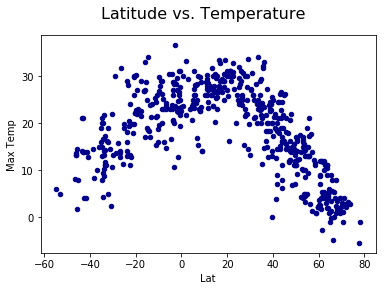

In [154]:
ax1 = weather_data.plot.scatter(x='Lat',y='Max Temp',c='DarkBlue')
plt.suptitle('Latitude vs. Temperature', fontsize=16)
plt.show()

#### Latitude vs. Humidity Plot

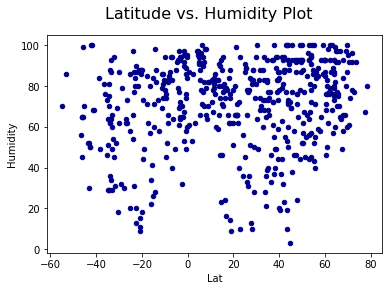

In [155]:
ax1 = weather_data.plot.scatter(x='Lat',y='Humidity',c='DarkBlue')
plt.suptitle('Latitude vs. Humidity Plot', fontsize=16)
plt.show()

#### Latitude vs. Cloudiness Plot

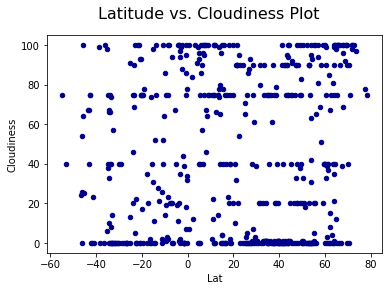

In [156]:
ax1 = weather_data.plot.scatter(x='Lat',y='Cloudiness',c='DarkBlue')
plt.suptitle('Latitude vs. Cloudiness Plot', fontsize=16)
plt.show()

#### Latitude vs. Wind Speed Plot

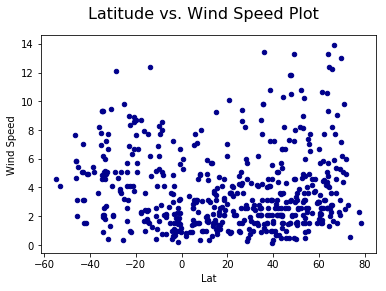

In [157]:
ax1 = weather_data.plot.scatter(x='Lat',y='Wind Speed',c='DarkBlue')
plt.suptitle('Latitude vs. Wind Speed Plot', fontsize=16)
plt.show()

## Linear Regression

In [170]:
# OPTIONAL: Create a function to create Linear Regression plots
def plotregression(x_calues,y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.plot(x_values,regress_values,"r-")
    
    plt.annotate(f"r value is:{round(rvalue,2)}",(min(x_values),min(y_values)+10),fontsize=15,color="red") 
    plt.annotate(line_eq,(min(x_values),min(y_values)),fontsize=15,color="red")
    return

In [171]:
# Create Northern and Southern Hemisphere DataFrames
Northern_df = weather_data.loc[weather_data['Lat'] >= 0]
Southern_df = weather_data.loc[weather_data['Lat'] < 0]


In [172]:
Northern_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Praia da Vitoria,20,PT,2019-09-23 15:18:26.000000,68,38.73,-27.07,22.00,5.71
1,Hofn,75,IS,2019-09-23 15:18:26.000000,93,64.25,-15.21,10.00,4.10
2,Camacha,20,PT,2019-09-23 15:18:26.000000,77,33.08,-16.33,22.00,2.10
3,San Cristobal,83,HN,2019-09-23 15:18:26.000000,71,14.68,-86.92,26.76,0.13
5,Khor,0,RU,2019-09-23 15:18:27.000000,83,47.88,134.96,7.16,5.63


In [173]:
Southern_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
4,Jamestown,0,AU,2019-09-23 15:18:27.000000,89,-33.21,138.60,4.06,1.59
8,Manggar,25,ID,2019-09-23 15:18:27.000000,95,-2.88,108.27,23.46,0.70
9,Coihaique,75,CL,2019-09-23 15:18:28.000000,66,-45.58,-72.07,13.00,2.60
11,Cape Town,0,ZA,2019-09-23 15:17:43.000000,77,-33.93,18.42,16.11,6.70
12,Bredasdorp,0,ZA,2019-09-23 15:18:28.000000,81,-34.53,20.04,10.56,2.10


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

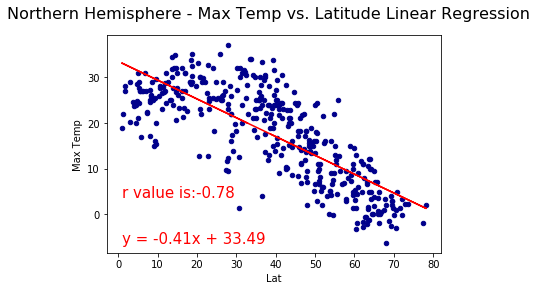

In [174]:


ax1 = Northern_df.plot.scatter(x='Lat',y='Max Temp',c='DarkBlue')

x_values = Northern_df['Lat']
y_values = Northern_df['Max Temp']
plotregression(x_values,y_values)
plt.suptitle('Northern Hemisphere - Max Temp vs. Latitude Linear Regression', fontsize=16)
plt.show()


# correlation value = -0.78  shows that there's a moderately strong relationship between 
# latitud and temperaturs which makes sense because the closest to the equator the higher the temperatures are
# And it is an inverse relationship which means the more the latitude decreases the more the temperature increases


# We can use y = -0.41x + 33.49
# To predict temperatures during the equinox for the northern hemisphere where x is latitude and y is temp in Celsius 



####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

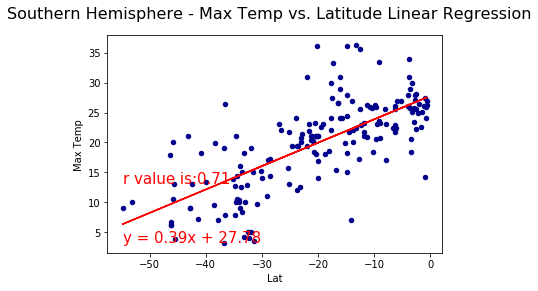

In [175]:
ax1 = Southern_df.plot.scatter(x='Lat',y='Max Temp',c='DarkBlue')

x_values = Southern_df['Lat']
y_values = Southern_df['Max Temp']
plotregression(x_values,y_values)
plt.suptitle('Southern Hemisphere - Max Temp vs. Latitude Linear Regression', fontsize=16)
plt.show()

# correlation value = -0.78  shows that there's a moderately strong relationship between 
# latitud and temperaturs which makes sense because the closest to the equator the higher the temperatures are


# We can use y = 0.39x + 27.78
# To predict temperatures during the equinox for the souther hemisphere where x is latitude anf y is temp in Celsius 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

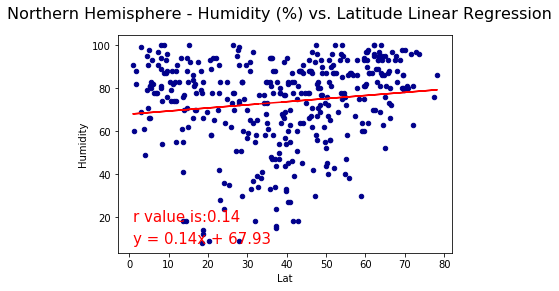

In [176]:

ax1 = Northern_df.plot.scatter(x='Lat',y='Humidity',c='DarkBlue')


x_values = Northern_df['Lat']
y_values = Northern_df['Humidity']
plotregression(x_values,y_values)
plt.suptitle('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression', fontsize=16)
plt.show()

# correlation value = 0.14  shows that there's really no relationship between humidity and latitude, humidity is pretty constant all along different latitudes

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

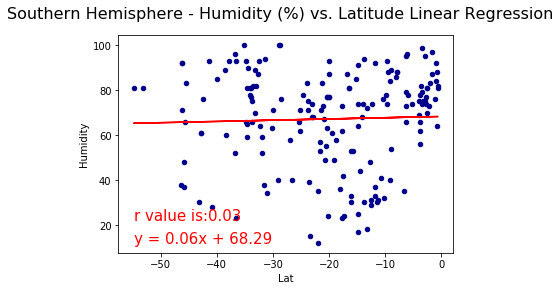

In [177]:
ax1 = Southern_df.plot.scatter(x='Lat',y='Humidity',c='DarkBlue')

x_values = Southern_df['Lat']
y_values = Southern_df['Humidity']
plotregression(x_values,y_values)
plt.suptitle('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression', fontsize=16)
plt.show()
# correlation value = 0.02  shows that there's really no relationship between humidity and latitude, humidity is pretty constant all along different latitudes

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

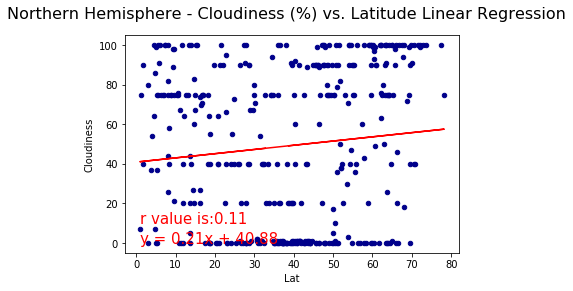

In [178]:
ax1 = Northern_df.plot.scatter(x='Lat',y='Cloudiness',c='DarkBlue')

x_values = Northern_df['Lat']
y_values = Northern_df['Cloudiness']
plotregression(x_values,y_values)
plt.suptitle('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression', fontsize=16)
plt.show()

# correlation value = 0.14  shows that there's really no relationship between cloudiness and latitude, cloudiness is pretty constant all along different latitudes

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

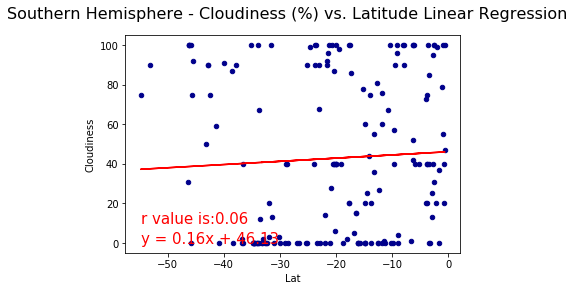

In [179]:
ax1 = Southern_df.plot.scatter(x='Lat',y='Cloudiness',c='DarkBlue')
x_values = Southern_df['Lat']
y_values = Southern_df['Cloudiness']
plotregression(x_values,y_values)
plt.suptitle('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression', fontsize=16)
plt.show()

# correlation value = 0.06  shows that there's really no relationship between humidity and latitude, humidity is pretty constant all along different latitudes


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

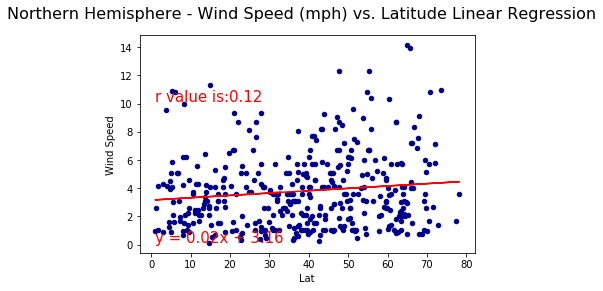

In [180]:
ax1 = Northern_df.plot.scatter(x='Lat',y='Wind Speed',c='DarkBlue')

x_values = Northern_df['Lat']
y_values = Northern_df['Wind Speed']
plotregression(x_values,y_values)
plt.suptitle('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression', fontsize=16)
plt.show()

# correlation value = 0.12  shows that there's really no relationship between wind speed and latitude, wind speed is pretty constant all along different latitudes


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

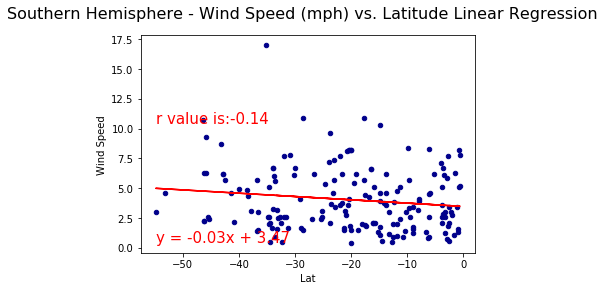

In [181]:
ax1 = Southern_df.plot.scatter(x='Lat',y='Wind Speed',c='DarkBlue')
x_values = Southern_df['Lat']
y_values = Southern_df['Wind Speed']
plotregression(x_values,y_values)
plt.suptitle('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression', fontsize=16)
plt.show()
# correlation value = -0.14  shows that there's really no relationship between wind speed and latitude, wind speed is pretty constant all along different latitudes
